Link Dataset : https://www.kaggle.com/code/mousaalrefaei/eda-it-salary-survey-2020/data

In [237]:
import numpy as np
from numpy import array
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ĐỌC VÀ TÌM HIỂU THÔNG TIN VỀ DỮ LIỆU

* Đọc dữ liệu từ file '/content/drive/MyDrive/KHOA HOC DU LIEU/GIUA KI/IT Salary Survey EU  2020.csv'
* Xuất ra số lượng mẫu dữ liệu thu thập được, và thông tin về các đặc trưng của dữ liệu

In [238]:
data = pd.read_csv('/content/drive/MyDrive/KHOA HOC DU LIEU/GIUA KI/IT Salary Survey EU  2020.csv')
sample_size = len(data)
print("NUMBER SAMPLE OF DATASET : ")
print(sample_size)
print("-----------------------------------------------------------------------")
print("INFORMATION OF DATASET : ")
print(data.info())



NUMBER SAMPLE OF DATASET : 
1250
-----------------------------------------------------------------------
INFORMATION OF DATASET : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1249 non-null   object 
 1   Age                                                                                                                      1223 non-null   float64
 2   Gender                                                                                                                   1240 non-null   object 
 3   City   

## LÀM SẠCH DỮ LIỆU

* Xoá đi các cột bị thiếu nhiều dữ liệu hoặc chứa các dữ liệu không hữu ích
* Đổi tên các cột lại ngắn hơn để thuận tiện trong việc thống kê số liệu

In [239]:

data = data.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Timestamp','Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR'])
# rename columns:

data.rename(columns = {'Your main technology / programming language'           : 'Main technology',
                       'Position '                                             : 'Position',
                       'Other technologies/programming languages you use often': 'Other technologies', 
                       'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary',
                       'Number of vacation days'                               : 'Vacation days', 
                       'Main language at work'                                 : 'Language at work',
                       'Yearly bonus + stocks in EUR'                          :'Yearly bonus',
                       'Total years of experience'                             : 'Years of experience' }, inplace = True)

> Xuất ra thông tin của 5 mẫu dữ liệu đầu tiên

In [240]:
data.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product


# CÂU **1** : Viết chương trình cài đặt phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy của một thông số thống kê của một biến (đặc trưng) nào đó của dataset với:


### Biến đặc trưng sử dụng : Yearly salary

In [241]:

values = data['Yearly salary'].values
print(values)


[ 80000.  80000. 120000. ...  38350.  65000.     nan]


### bootstraps function 
* Input :   
>> * data : dataframe dữ liệu ban đầu
>> * n_sample : sample size 
>> * n_boostraps: number of bootstrap samplings
>> * x : confidence_interval (%)

In [242]:
def bootstraps(data, n_sample , n_bootstraps=100, x=90):
    dc   = []
    #get list of row indexes
    idx = [i for i in range(n_sample)]
    #loop through the required number of bootstraps
    for b in range(n_bootstraps):
        #obtain boostrap samples with replacement
        sidx   = np.random.choice(idx,replace=True,size=n_sample)
        b_samp = data[sidx].std()

        dc.append(b_samp)
    dc=sorted(dc)
    start = int (((100-x)/2)/100 * n_bootstraps)
    end = n_bootstraps - start

    plt.figure(figsize=(20,8))
    sns.histplot(dc,bins=50,color='olivedrab')
    min_ylim,  max_ylim = plt.ylim()
    plt.ylim([min_ylim, max_ylim +15])

    plt.vlines(x=dc[start],ymin=0, ymax=max_ylim+10, color='k', linestyle='solid')
    plt.vlines(x=dc[end],ymin=0, ymax=max_ylim+10,color='k', linestyle='solid')
    plt.vlines(x=np.asarray(dc).mean(),ymin=0, ymax=max_ylim,color='k', linestyle='--')
    plt.hlines(y=max_ylim +5, xmin=dc[start], xmax=dc[end], colors='k', linestyles='solid')


    plt.text(np.asarray(dc[start:end]).mean(),max_ylim+5,str(confidence_interval)+'% interval' , ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.text(dc[start],max_ylim+10, str(round(dc[start],2)), ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.text(dc[end],max_ylim+10, str(round(dc[end],2)), ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.text(np.asarray(dc).mean(),max_ylim//4, 'Mean:'+str(round(np.asarray(dc).mean(),2)), ha='center', va='center',rotation='horizontal', bbox={'facecolor':'white', 'pad':5})


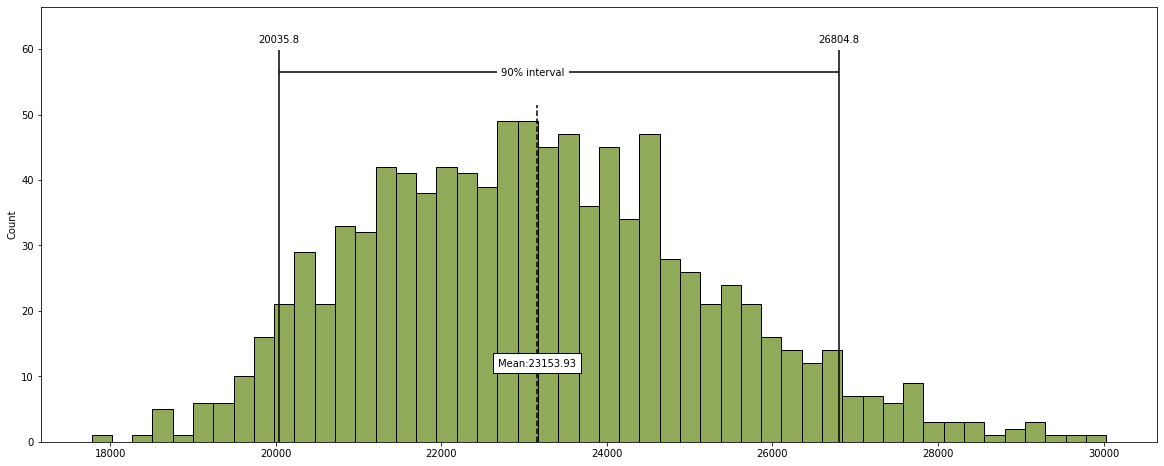

In [243]:
confidence_interval = 90
bootstraps(values,sample_size//2,1000,confidence_interval)



# CÂU 2


### Công việc IT phân bố như thế nào theo độ tuổi và giới tính ?







> * Cột dữ liệu 'Age' chứa 1223/1250 dữ liệu NotNull. Vì vậy cần loại bỏ các giá trị Null trước khi thống kê mật độ phân bố dữ liệu theo độ tuổi
>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


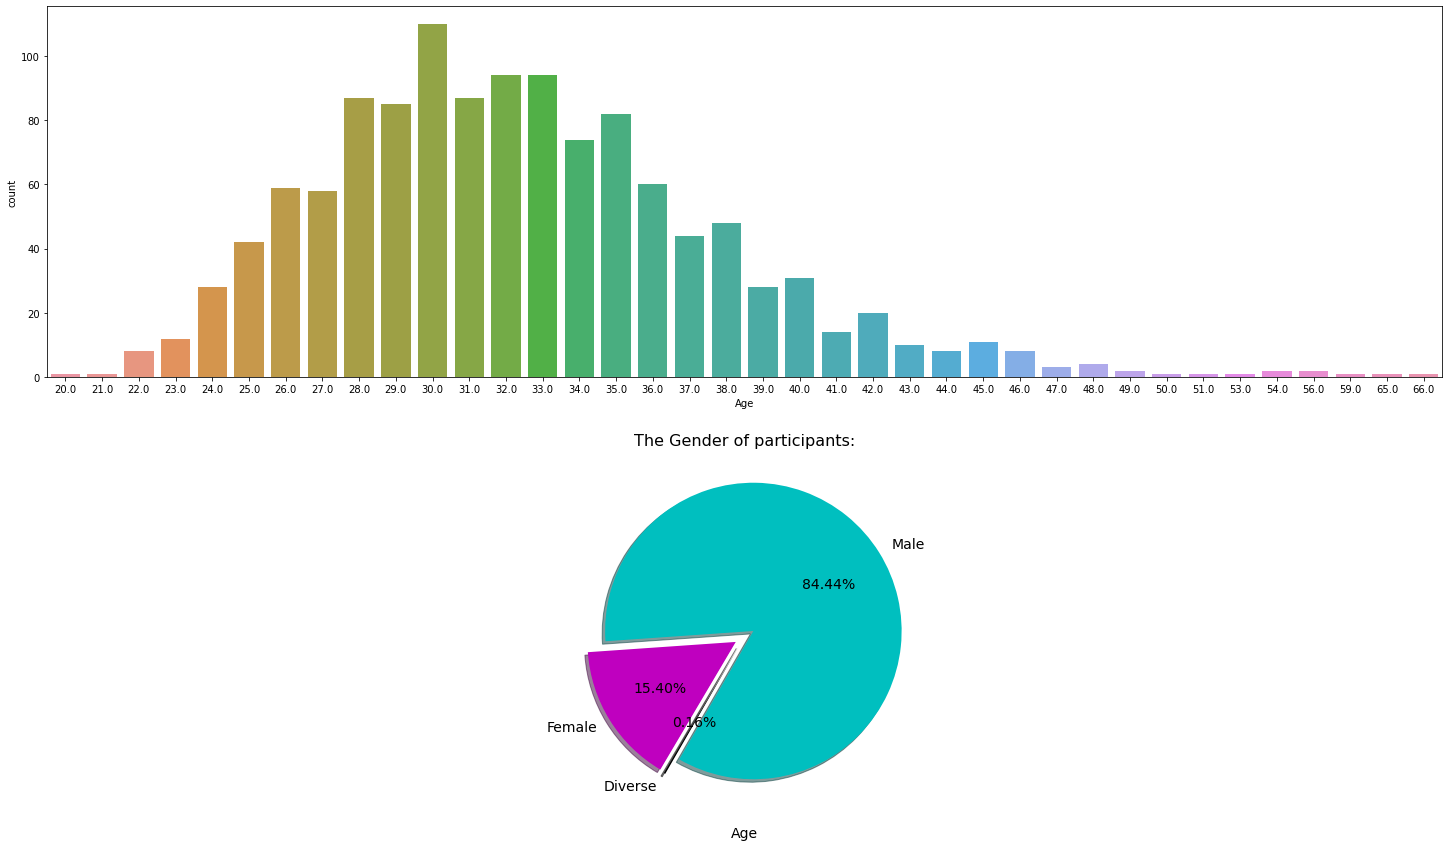

In [244]:
fig,axes=plt.subplots(2,figsize=[25,15])
sns.countplot( data['Age'][(data['Age'] != None)], x='Age',ax=axes[0])
plt.title('The distribution of the ages of the participants:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Count', fontsize = 14)


data['Gender'].value_counts().plot.pie(autopct= '%1.2F%%', fontsize= 14, startangle= 240, explode= [0.07]*3, shadow= True, colors = ['c','m','k'],ax=axes[1])
plt.title('The Gender of participants:',fontsize = 16)
plt.ylabel('')
plt.show()



> Nhận xét : 
* Tuổi làm việc của ngành IT phân bố từ 20 -66 tuổi, trong đó 30 tuổi chiếm mật độ nhiều nhất
* Công việc ngành IT phân bố trên tất cả các giới tính, nam giới chiếm tỉ trọng giới tính lớn nhất trong ngành (84.44%)

### Top 10 ngôn ngữ lập trình và công nghệ được sử dụng nhiều nhất

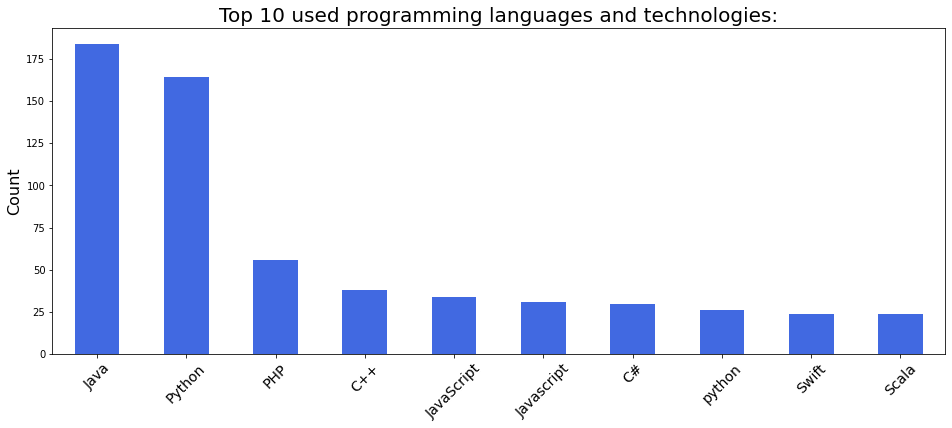

In [245]:
plt.figure(figsize=(16, 6))
ax = data['Main technology'].value_counts().head(10).plot(kind = 'bar', color = 'royalblue')
plt.title('Top 10 used programming languages and technologies:', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.show()

### Mối quan hệ giữa số năm kinh nghiệm, giới tính và chức vụ trong ngành IT

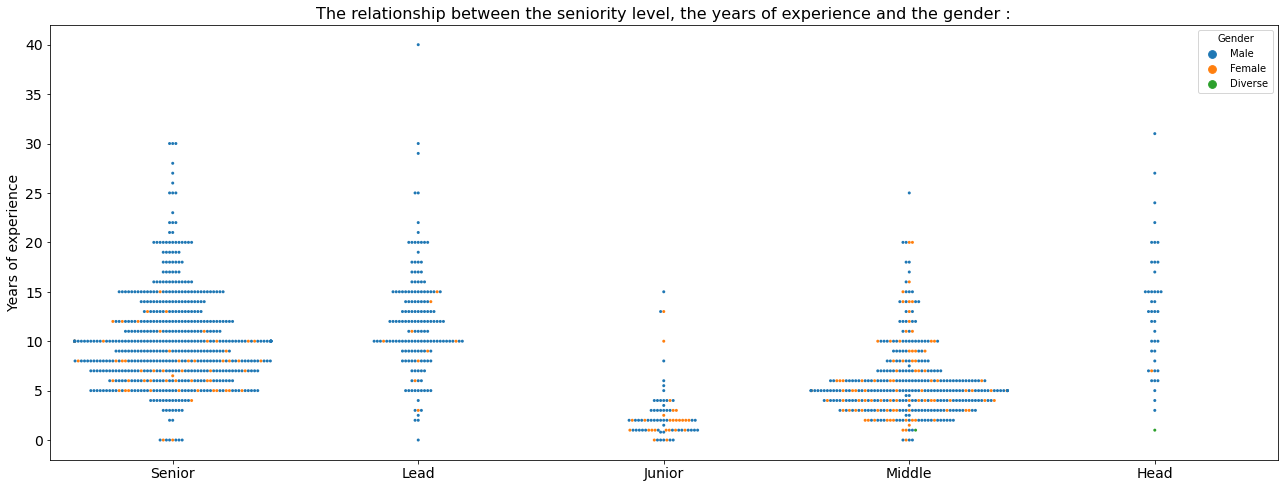

In [247]:


data['Years of experience'] = pd.to_numeric(data['Years of experience'], errors = 'coerce').fillna(0)
data['Age'] = data['Age'].fillna(0).astype(int)

experience_seniority = data.loc[data['Seniority level'].isin(['Senior', 'Middle','Lead', 'Junior', 'Head'])]


plt.figure(figsize=(22, 8))
sns.swarmplot(data= experience_seniority, x='Seniority level', y= 'Years of experience',s = 3, hue= 'Gender')
plt.title('The relationship between the seniority level, the years of experience and the gender :', fontsize = 16)
plt.xlabel('')
plt.ylabel('Years of experience' ,fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize = 14)
plt.show()

> Nhận xét : 
* Chức vụ Junior : chủ yếu từ 2-5 năm kinh nghiệm
* Chức vụ Senior : chủ yếu từ 5-10 năm kinh nghiệm
* Chức vụ Lead : chủ yếu từ 10-15 năm kinh nghiệm trở lên
* Chức vụ Head : chủ yếu từ 15 năm kinh nghiệm

> Càng nhiều năm kinh nghiệm, thì càng giữ các chức vụ quan trọng

> Giới tính nữ giữ chức vụ Middle chiếm số lượng nhiều hơn so với các chức vụ khác



### Mối quan hệ giữa số năm kinh nghiệm và lương trong ngành IT

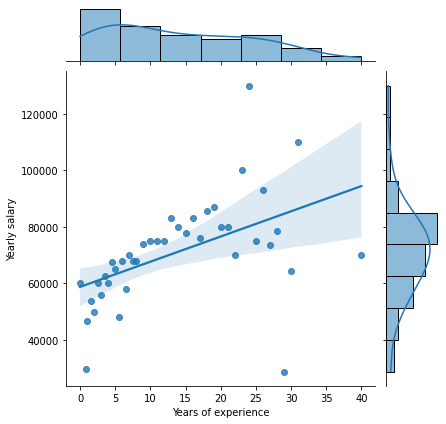

In [248]:

age = data.loc[(data['Years of experience'] != None ) ]
age_salary = age.groupby('Years of experience',as_index = False).median()
sns.jointplot(data= age_salary, x= 'Years of experience', y= 'Yearly salary',kind='reg')

> Nhận xét: Đường xu hướng có xu hướng đi lên , Có sự ràng buộc giữa số năm kinh nghiệm và mức lương, 


### Mối quan hệ giữa các vị trí làm việc và lương trong ngành IT

 10 vị trí làm việc có mức lương trung bình cao nhất

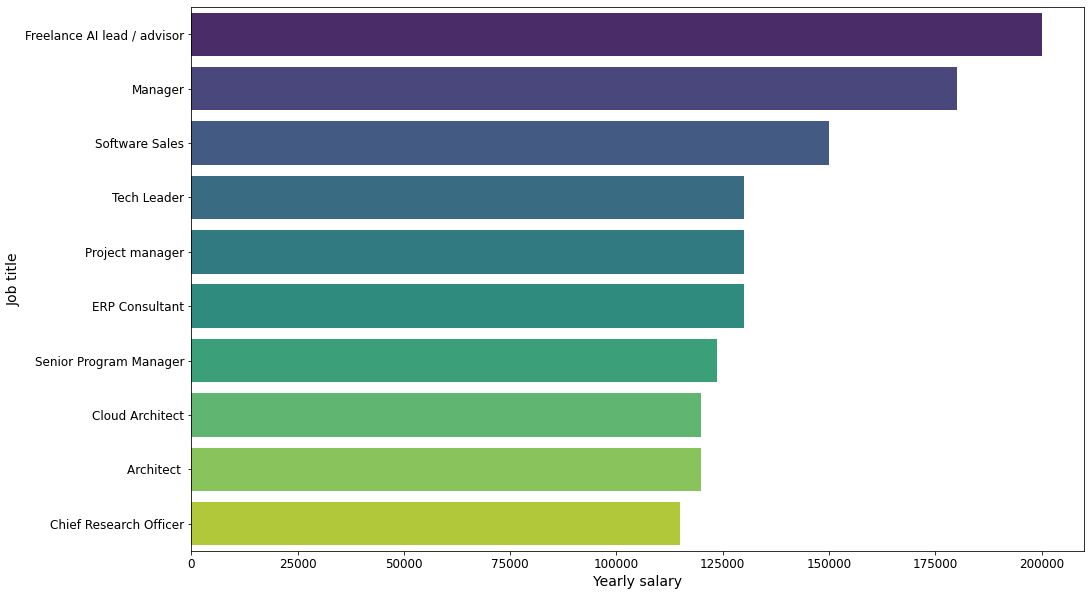

In [249]:
position = data.groupby('Position', as_index= False).median().sort_values('Yearly salary', ascending = False).head(10)
plt.figure(figsize= (16 , 10))
sns.barplot(data = position, y = 'Position', x = 'Yearly salary', palette = 'viridis')
plt.xlabel('Yearly salary', fontsize= 14)
plt.ylabel('Job title', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

> Nhận xét : Có sự chênh lệch mức lương trung bình giữa các vị trí làm việc. Trong đó, Freelance AI lead có mức lương cao nhất

## Sự tương quan giữa các đặc trưng tuổi, số năm kinh nghiệm, số lương

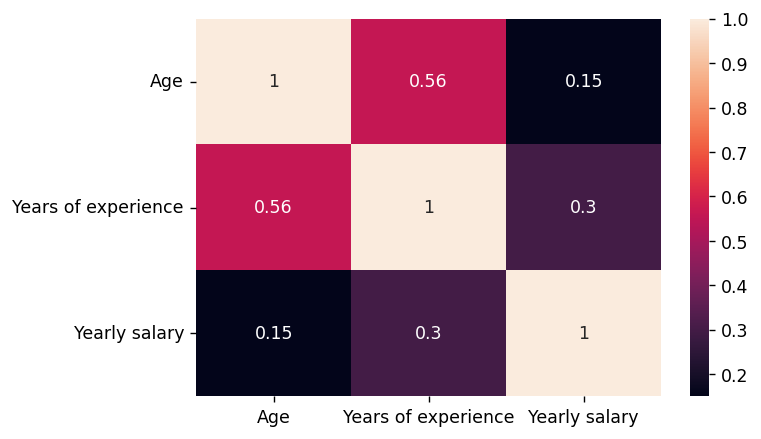

In [250]:
data['Years of experience'] = pd.to_numeric(data['Years of experience'], errors = 'coerce').fillna(0)
data['Age'] = data['Age'].fillna(0).astype(int)
data['Yearly salary'] = data['Yearly salary'].fillna(0).astype(int)
plt.figure(dpi=125)
sns.heatmap(np.round(data.corr(),2),annot=True)
plt.show()

> Nhận xét: Độ tuổi và số năm kinh nghiệm có mối tương quan tốt là 0.56
>> 

## Nhận xét chung:
* Ngành IT chiếm số lượng chủ yếu là nam giới.
* Java và Python được sử dụng nhiều 
* Độ tuổi có sự tương đồng lớn với số năm kinh nghiệm
* Số năm kinh nghiệm càng nhiều thì càng được chiếm những chức vụ quan trọng, và mức lương càng cao
* Giữa các vị trí làm việc có sự chênh lệch về lương, top những vị trí có thu nhập cao nhất là : Freelance AI lead , Manager, Software Sales, Tech Leader, Project Manager, ... 
